# Regression Analysis of the NPLD Stratigraphy
## CMPS 6160 Final Tutorial (Milestone 1) - Alan Braeley

### Project website:
https://abraeley.github.io/

### Project repository: 
https://github.com/abraeley/abraeley.github.io

### Project data: 
https://github.com/abraeley/abraeley.github.io/data

#### Raw SHARAD data: 
https://pds-geosciences.wustl.edu/missions/mro/sharad.htm



__Background:__ The north and south poles of Mars are composed primarily of a combination of water ice, dust, and in the south, carbon dioxide. These polar ice caps are often referred to as the north and south polar layered deposits (NPLD/SPLD). The PLD are thought to record up to approximately 5 Mya of climate history on Mars, trapped in the stratigraphy of the ice. In order to study and learn from this geological history,  we must first be able to properly interpret the data. When the dielectric properties of a layer interface with another, a radar reflection (called a "reflector") may be generated. The radar data that is recieved back takes the form of a cross-section of the ice cap, from the surface to the bedrock below the ice:

<center><img src="images/radargram.png"/></center>

The brightness of each reflector tells us something about the material composition of the layer, while the time it takes to receive a reflection back tells us the depth of the reflector (since radar moves consistently at the speed of light). A reflector's brightness is determined by the difference between the dielectric properties of two layers. The instrument that is used to collect these radargrams is called SHARAD (shallow radar), a radar sounder aboard the Mars Reconnaissance Orbiter. SHARAD emits a 15-25 MHz radar signal into the ice caps in order to see into the interior structure beneath the surface of the ice.

Cutting into the NPLD are troughs inside which exposed stratigraphic layerse are visible in optical light:

<center><img src="images/layers.jpg"/></center>

It has been thought that these stratigraphic layers correspond in a one-to-one basis with the reflectors seen in SHARAD radargrams. 

__Motivation:__ A collaborator on my research (Dr. Bruce Campbell) split the radar data into two sub-bands (called split chirp data): a low frequency sub band of 15-20 MHz, and a high-frequency band of 20-25 MHz:

<center><img src="images/example.gif"/></center>

From this it is clear that there are differences between the high and low frequency radar data. Implicit therein is that at least some of the PLD is sensitive to the frequency of the radar. This resolution-sensitive is telling, as radar is already some distance from the optical part of the electromagnetic spectrum. It is therefore unlikely that one can assume a one-to-one relationship between images in radio-wavelength data with those seen in optical data. The reflectors in the PLD is therefore not the same as a stratigraphic layer, as seen in photographs.

### Model-Generated Data:
I will be using two datasets: one that I generate, and one that comes from SHARAD (shallow radar) sounder data from the Mars Reconnaissance Orbiter. 


The first dataset is to be created by using the 1-dimensional model developed by Sam Courville from the SHARAD team. This model takes in several "layer property" parameters (as opposed to processing parameters):

<center><img src="images/1dmodel.png"/></center>

As shown above, number of layers (n), thicknesses of the layers (m) (the final layer is considered unbounded so the thickness is effectively infinite and does not count), the dielectric constants of the layers, and the loss tangents of the layers are all input parameters. The other parameters vary the way the model processes the layer property parameters. For example, rather than using the SHARAD instrument frequency band (15-25 MHz), a sub band can be used (i.e. 15-20 MHz), or a different frequency range can be selected altogether.

The model outputs a dataset contained in a csv file, with time (in microseconds), power (in dB) and amplitude columns. It also plots the power as a function of time, with power on the x-axis:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading in the csv files
low3df = pd.read_csv('data/Intersection_3/Model3_L_output_data.csv', sep=",")
high3df = pd.read_csv('data/Intersection_3/Model3_H_output_data.csv', sep=",")
low3df.head(10)

,Time (s),power (dB),amplitude (real),amplitude (imag)
0,-0.000043,-57.853135,-3.892997e-09,-3.692354e-10
1,-0.000042,-57.779216,3.897481e-09,6.032395e-10
2,-0.000042,-57.313703,-4.094372e-09,-7.417902e-10
3,-0.000042,-56.853206,4.335889e-09,6.715193e-10
4,-0.000042,-56.701135,-4.444132e-09,-4.319517e-10
5,-0.000042,-56.957712,4.331215e-09,1.836783e-10
6,-0.000042,-57.521867,-4.061128e-09,-1.051084e-10
7,-0.000042,-58.031659,3.821435e-09,2.693440e-10
8,-0.000042,-57.999919,-3.802190e-09,-5.717598e-10
9,-0.000042,-57.404672,4.042892e-09,7.811902e-10


Text(0.5, 1.0, 'High Freq (20-25 MHz)')

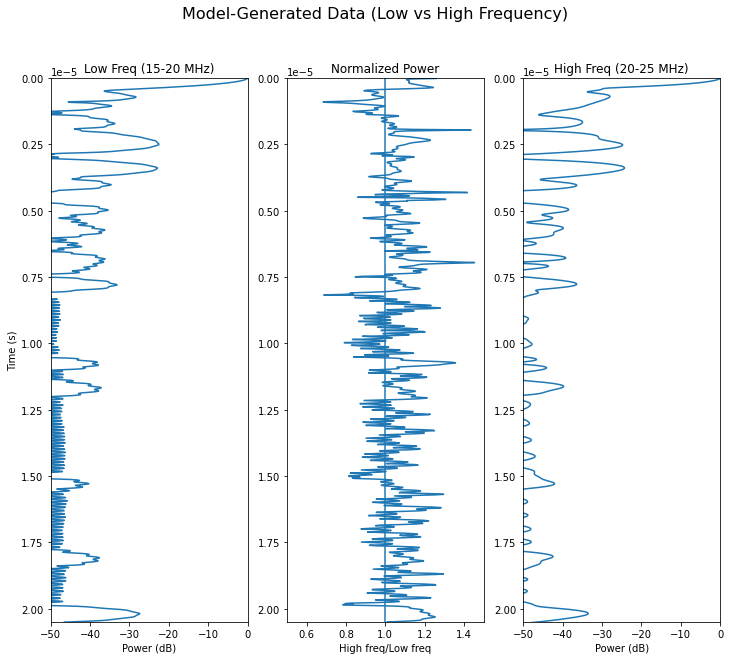

In [2]:
# Creating three figures, a high frequency,  low frequency, and normalized frequencies plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
fig.suptitle('Model-Generated Data (Low vs High Frequency)', fontsize=16)

lowExample = low3df.plot(ax=axes[0], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="Time (s)", legend=False)
lowExample.set_ylim(0, 0.0000205)
lowExample.set_xlim(-50, 0)
lowExample.invert_yaxis()
lowExample.set_title("Low Freq (15-20 MHz)")

normdf = high3df
normdf["Normalized (High/Low)"] = high3df["power (dB)"]/low3df["power (dB)"]
normalizedPlot = normdf.plot(ax=axes[1], x="Normalized (High/Low)", y='Time (s)', xlabel="High freq/Low freq", legend=False)
normalizedPlot.set_ylim(0, 0.0000205)
normalizedPlot.set_xlim(0.5, 1.5)
normalizedPlot.invert_yaxis()
normalizedPlot.axvline(1)
normalizedPlot.set_title("Normalized Power")

highExample = high3df.plot(ax=axes[2], x='power (dB)', y='Time (s)', xlabel="Power (dB)", legend=False)
highExample.set_ylim(0, 0.0000205)
highExample.set_xlim(-50, 0)
highExample.invert_yaxis()
highExample.set_title("High Freq (20-25 MHz)")

Shown above are two such model-generated plots (and a normalized figure too). Made by manually entering the layer parameters in the 1D Radar Simulator model and changing the frequency bands into a low and high frequency (15-20 MHz, and 20-25 MHz respectively). It should be noted that time is a stand-in for distance/depth beneath the surface of the ice cap, as the speed of light is a constant. The following formula can be used to convert the time to distance:

<center><h1>$ d = \frac{tc}{2\sqrt{\epsilon}} $</h1></center>

Where $d$ is distance, $t$ is time it takes to receive the radar return and $\epsilon$ is the dielectric constant.

The power vs time figures showcase that the reflectors are sensitive to radar frequency (note that although the normalized power subplot is approximately centered around one, there are power peaks that appear uniquely in the low and high frequency figures (at the same depth beneath the surface ice). The normalized plot shows that there are significant, and extensive, differences between the split data, implying sensitivity to the changing frequency bands.

### SHARAD Split Chirp Data

The raw SHARAD data comes in the form of a radargram, which is recorded in a single track as the MRO spacecraft orbits above Mars:

<center><img src="images/tracks.png"/></center>

All radargrams are 3600 pixels tall (there are 3600 pixel rows comprising the image). In order to replicate the data produced by the SHARAD model, a one-pixel-wide, vertical column of power values can be taken at each pixel from spanning the height of the radargram. By then cutting the data to the surface and basal reflectors in the figure a power versus time figure will be produced out of the split chirp data. Each pixel down is equivalent to 0.0375 microseconds of time (and therefore has a corresponding distance value too).

In [3]:
# Setting some basic parameters (selecting where on the rows I want to an)
timePixel = 0
columnNumber = 1110

# Reading in the SHARAD split chirp data
with open('data/s_03196501/S_03196501_L_RGRAM.IMG', mode='r') as f:
 data = np.fromfile(f,dtype=np.float32)
 #datatest = np.matrix(data)

radargram = data.reshape(3600, -1)


powerColumn1 = []
time = []

columnNumber -= 1
#Python starts iterating at zero so the last column is columnNumber - 1

for pixelRow in range(0,len(radargram)):
    #print("pixelRow: "+pixelRow+" Raw power: "+)
    
    '''
    Iterating straight down at a given column
    Using the center column value as a pixel value reference, 
    take the left and right 10 columns-worth of data. In order to do this 
    find the pixel value in the column to the left and right of the center 
    column that most matches that of the center reference pixel value. 
    By doing this I will be able to follow the path of each continuous lateral
    reflector as I take averages downward.
    '''
    time.append(timePixel)
    
    # time per pixel
    timePixel+=0.0375
    
    leftNum = columnNumber - 1
    leftNum2 = columnNumber - 2
    leftNum3 = columnNumber - 3
    rightNum = columnNumber + 1
    rightNum2 = columnNumber + 2
    rightNum3 = columnNumber + 3
        
    rowLeft3 = radargram[pixelRow][leftNum3]
    rowLeft2 = radargram[pixelRow][leftNum2]
    rowLeft = radargram[pixelRow][leftNum]
    rowCenter = radargram[pixelRow][columnNumber]
    rowRight = radargram[pixelRow][rightNum]
    rowRight2 = radargram[pixelRow][rightNum2]
    rowRight3 = radargram[pixelRow][rightNum3]

    powerRow = [rowLeft,rowLeft2,rowLeft3,rowCenter,rowRight,rowRight2,rowRight3]

    powerRow = [10*math.log10(x) for x in powerRow]
    powerRow = sum(powerRow)/len(powerRow) #Average of columns
    powerColumn1.append(powerRow)
    
# Top of surface reflector  
beginning = 2377

# Top of basal reflector
end = 2897

time = time[beginning:end]
powerColumn1 = powerColumn1[beginning:end]

In [4]:
# Reading in the high frequency data
timePixel = 0   

columnNumber = 1110

with open('data/s_03196501/S_03196501_H_RGRAM.IMG', mode='r') as f:
 data = np.fromfile(f,dtype=np.float32)
radargram = data.reshape(3600, -1)

powerColumn2 = []
time = []

columnNumber -= 1
#Python starts iterating at zero so the last column is columnNumber - 1

for pixelRow in range(0,len(radargram)):
    
    '''
    Iterating straight down at a given column
    Using the center column value as a pixel value reference, 
    take the left and right 10 columns-worth of data. In order to do this 
    find the pixel value in the column to the left and right of the center 
    column that most matches that of the center reference pixel value. 
    By doing this I will be able to follow the path of each continuous lateral
    reflector as I take averages downward.
    '''
    time.append(timePixel)

    timePixel+=0.0375
    
    leftNum = columnNumber - 1
    leftNum2 = columnNumber - 2
    leftNum3 = columnNumber - 3
    rightNum = columnNumber + 1
    rightNum2 = columnNumber + 2
    rightNum3 = columnNumber + 3
    
    rowLeft3 = radargram[pixelRow][leftNum3]
    rowLeft2 = radargram[pixelRow][leftNum2]
    rowLeft = radargram[pixelRow][leftNum]
    rowCenter = radargram[pixelRow][columnNumber]
    rowRight = radargram[pixelRow][rightNum]
    rowRight2 = radargram[pixelRow][rightNum2]
    rowRight3 = radargram[pixelRow][rightNum3]
    
    powerRow = [rowLeft,rowLeft2,rowLeft3,rowCenter,rowRight,rowRight2,rowRight3]

    powerRow = [10*math.log10(x) for x in powerRow]
    powerRow = sum(powerRow)/len(powerRow) #Average of columns
    powerColumn2.append(powerRow)
    
# Top of surface reflector  
beginning = 2383

# Top of basal reflector in the radargram
end = 2903

time = time[beginning:end]
powerColumn2 = powerColumn2[beginning:end]

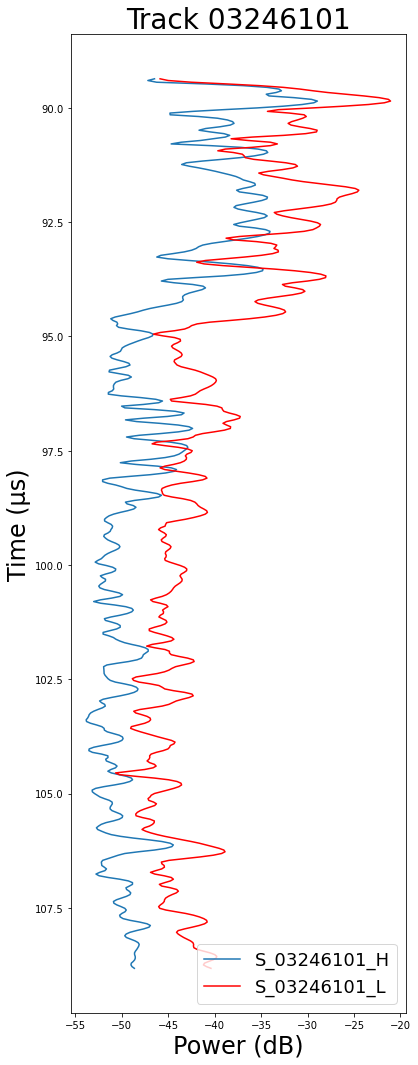

In [5]:
# Plotting the power versus time figures for both high and low frequency data
fig, axs = plt.subplots(figsize=(6,18)) 
plt.plot(powerColumn2,time)  
plt.plot(powerColumn1,time, color='red') 
plt.title("Track 03246101", fontsize=28)
plt.legend(["S_03246101_H", "S_03246101_L"], loc=4, fontsize=18)
plt.xlabel('Power (dB)', fontsize=24)  
plt.ylabel('Time (\u03BCs)', fontsize=24)
axs.invert_yaxis()
plt.show()

__Plan and question(s) to be answered:__  My goal is to leverage the one-dimensional model created by the SHARAD team (introduced below) in order to determine what of the model input parameters (dielectric constant, layer thickness, etc.) has what sort of impact on the reflectors as a function of frequency. After that, my goal will be to apply this knowledge to the split chirp SHARAD data in order to explore the interior stratigraphy, the geospatial distribution of dielectric properties and to hopefully serve as a stepping stone forward in our ability to further unlock the recent martian climate history.

To accomplish this I will write a python script to automate the varying of input parameters, and the running of the SHARAD model. With a large dataset outputted by the model, I will then use the various input parameters for each respective model dataset in order to train a neural network, where the model input parameters (and their respective models) will become the various input features for the neural network.


### Neural network for regression:

<center><img src="images/neuralnetwork.png"/></center>

__Input 1:__ Number of layers (n)

__Input 2:__ Thicknesses of n-1 layers (m)

__Input 3:__ Real relative dielectric constants of n layers

__Input 4:__ Loss tangent of n layers

At this point I will apply the neural network to the actual SHARAD split chirp data, hopefully revealing a new understanding of how stratigraphy and material composition impact reflectors in the SHARAD split chirp data.

#### SHARAD instrument documentation: 
Seu, R., Phillips, R. J., Biccari, D., Orosei, R., Masdea, A., Picardi, G., Safaeinili, A., Campbell, B. A., Plaut, J. J., Marinangeli, L., Smrekar, S. E., & Nunes, D. C. (2007). SHARAD sounding radar on the Mars Reconnaissance Orbiter. Journal of Geophysical Research, 112(E5), E05S05. https://doi.org/10.1029/2006JE002745

#### Background reading:
Byrne, S. (2009). The Polar Deposits of Mars. Annual Review of Earth and Planetary Sciences, 37(1), 535–560. https://doi.org/10.1146/annurev.earth.031208.100101

Smith, I. B., Hayne, P. O., Byrne, S., Becerra, P., Kahre, M., Calvin, W., ... & Horgan, B.
(2020), The Holy Grail: A road map for unlocking the climate record stored within Mars’ polar
layered deposits, Planet. Space Sci., 184, 104841. https://doi.org/10.1016/j.pss.2020.104841